# PREDIKSI PEROKOK MENGGUNAKAN ALGORITMA LOGISTIC REGRESSION

### Memanggil seluruh library yang dibutuhkan

1. BUSSINESS UNDERSTANDING

    Masuk ke dalam tahap pertama dari model CRISP-DM, Bagaimana Membangun dan Mendapatkan data Dan menentukan Tujuan. 
    
--Bussiness Problem :
  Rokok merupakan hal yang paling banyak dikonsumsi masyarakat hingga saat ini dan tidak dapat dipungkiri bisa mempengaruhi kesehatan tubuh kita dalam jangka waktu panjang. Pada rokok terdapat zat-zat yang berbahaya dan juga adiktif yang dapat mempengaruhi fisik dan psikologis orang yang mengkonsumsinya seperti nikotin, tar, karisnogen dan lainnya. Oleh karena itu para pengkomsumsinya dapat beresiko terkena serangan jantung, impotensi, gangguan ibu dan janin dan masih banyak lainnya

--Himpunan Data :
  Data ini diperoleh dari kaggle.com "hhttps://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking"

--Tujuan :
  Analisis ini untuk mengetahui seberapa banyak orang yang aktif merokok dan tidak merokok, juga untuk melakukan prediksi/forecast apakah orang tersebut perokook aktif atau bukan dengan menggunakan parameter berupa tanda-tanda dari tubuh seseorang tersebut

2. Data Understanding
Pada Analisis ini menggunakan model Regresi Linear maka tipe data yang cocok yaitu numerik (int,float)
Berikut Himpunan Data yang sudah dipilih(Dataset) beserta tipe data :

 0   ID                         Nomer seri pada setiap orangnya (int64)
 1   gender                     Jenis Kelamin (object) 
 2   age                        Umur (float64)
 3   height(cm)                 Tinggi Badan (int64)
 4   weight(kg)                 Tinggi Badan (int64)
 5   waist(cm)                  Ukuran Lingkar Pinggang (float64)
 6   eyesight(left)             Kualitas Pandangan Mata Kiri (float64)
 7   eyesight(right)            Kualitas Pandangan Mata Kanan (float64)
 8   hearing(left)              Pendengaran Telinga Kiri (float64)
 9   hearing(right)             Pendengaran Telinga Kanan (float64)
 10  systolic                   Sistolik Tekanan Darah (float64)
 11  relaxation                 Kondisi Tekanan Darah (float64)
 12  fasting blood sugar        Tingkat Gula Darah Sebelum Makan (float64)
 13  Cholesterol                Tingkat Kolesterol (float64)
 14  triglyceride               Tingkat Triglyceride (float64)
 15  HDL                        Jenis Kolesterol (float64) 
 16  LDL                        Jenis Kolesterol (float64)
 17  hemoglobin                 Tingkat Hemoglobin (float64)
 18  Urine protein              Tingkat Kandungan Protein Pada Urin (int64)
 19  serum creatinine           Tingkat Serum Creatinine (float64)
 20  AST                        Tingkat AST (float64)
 21  ALT                        Tingkat ALT (float64)
 22  Gtp                        y-GTP (float64)
 23  oral                       Kondisi Kualitas Mulut (float64)
 24  dental caries              Kondisi Karies Gigi (float64)
 25  tartar                     Status Tartar (float64)
 26  smoking                    Label Perokok dan Tidak Perokok (float64)

Terdapat tipe data float, integer dan object. Nantinya data yang bertipe object akan dirubah menjadi float atau integer untuk mempermudah proses analisis

3. Data Preparation

Tahap ini memastikan data yang tepat berdasarkan model algoritma yang digunakan yaitu Regresi Linear
Data yang tepat untuk digunakan : Energy , Protein, Total_fat, Cholesterols , Total_carbohydrate, Total_Sugars.

(x)feature : 'gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar'

(y)label :smoking

5. Evaluation
Pada tahap ini akan dilakukan evaluasi terhadap keefektifan dan kualitas model sebelum digunakan 

6. Deployment
Pada tahap ini, pengetahuan atau informasi yang telah diperoleh dari analisis akan diatur 
dan dipresentasikan dalam bentuk aplikasi streamlit sehingga dapat digunakan oleh pengguna. 

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns

### Melakukan import dataset

In [31]:
df=pd.read_csv('smoking.csv')

In [32]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [34]:
df.shape

(55692, 27)

#### Korelasi data

C:\Users\NAUFAL HAFIZH\AppData\Local\Temp\ipykernel_19012\3648873261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

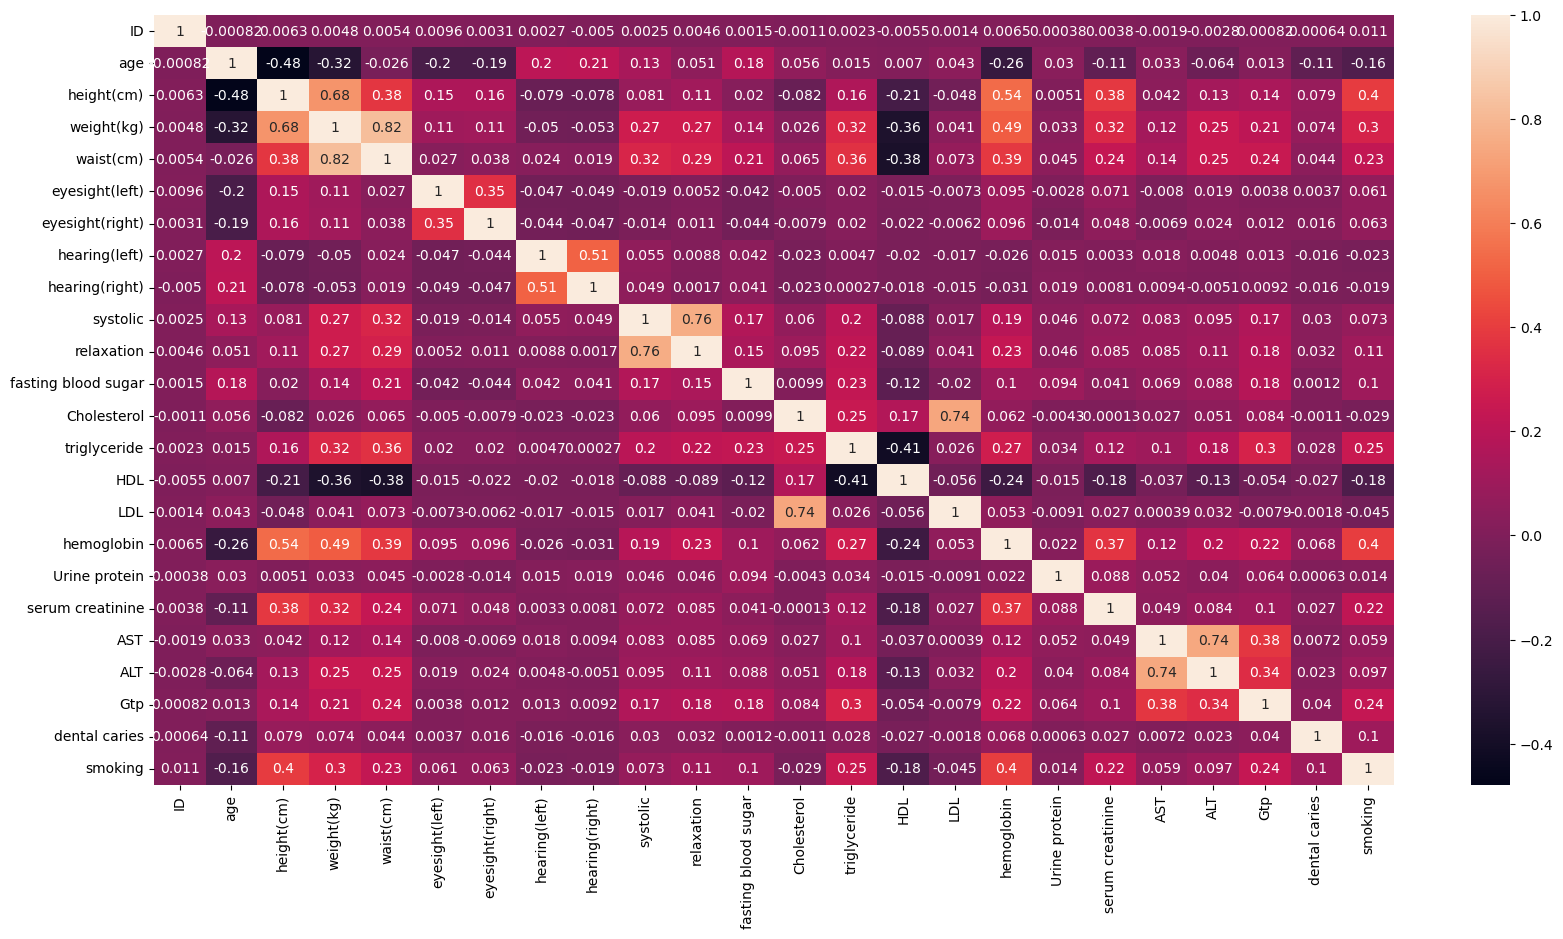

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

#### Persentase perokok

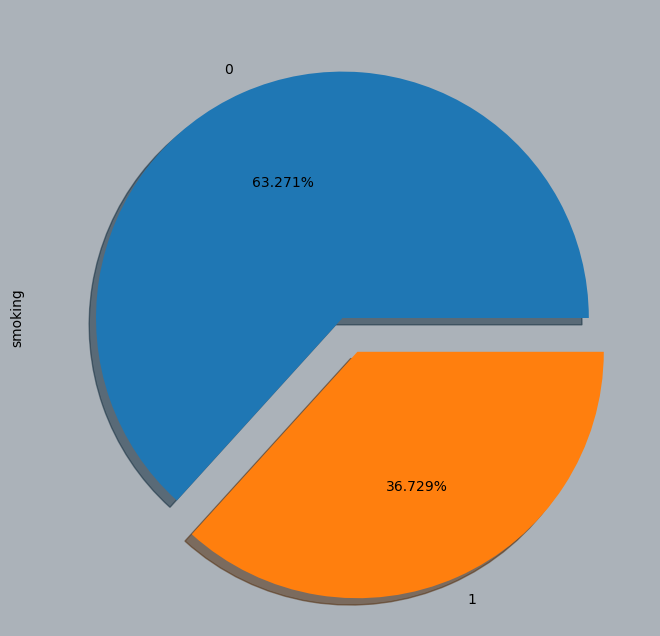

In [36]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

#### Persentase perokok berdasarkan gender

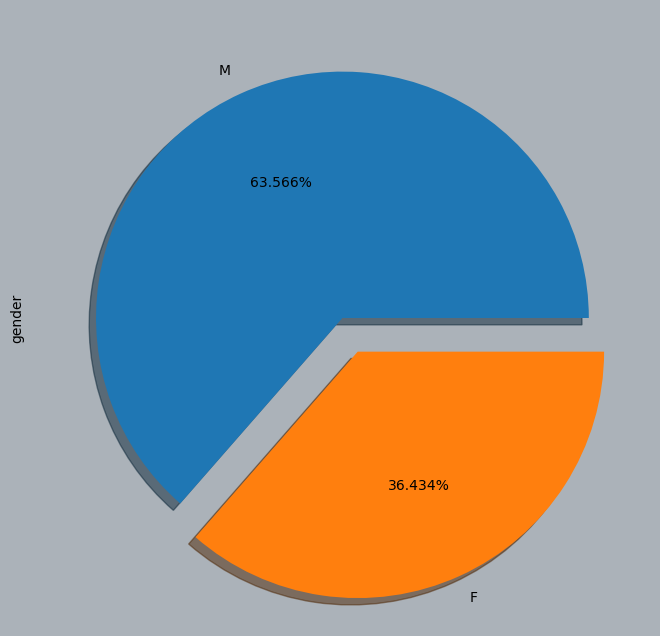

In [37]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

<AxesSubplot:>

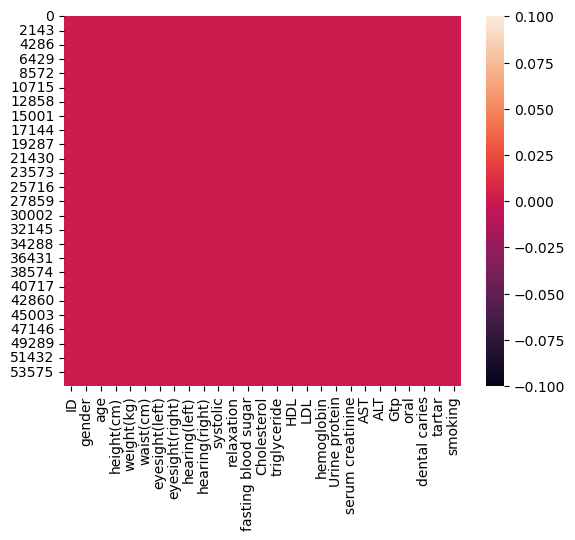

In [38]:
sns.heatmap(df.isnull())

### Merubah nama kolom agar lebih singkat

In [4]:
df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol', 
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein', 
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height               55692 non-null  int64  
 4   weight               55692 non-null  int64  
 5   waist                55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hdl                  55692 non-null 

### Merubah data menjadi integer/float

Perempuan  = 0
Laki-laki = 1

In [6]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')

In [7]:
print(df['gender'])

0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: object


In [8]:
df['gender'] = pd.to_numeric(df['gender'])

In [9]:
print(df['gender'])

0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: int64


#### Tartar

N=0
Y=1

In [10]:
df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')

In [11]:
df['tartar'] = pd.to_numeric(df['tartar'])

In [12]:
print(df['tartar'])

0        1
1        1
2        0
3        1
4        0
        ..
55687    1
55688    1
55689    0
55690    0
55691    1
Name: tartar, Length: 55692, dtype: int64


#### Oral

N=0 Y=1

In [13]:
df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')

In [14]:
df['oral'] = pd.to_numeric(df['oral'])

In [15]:
print(df['oral'])

0        1
1        1
2        1
3        1
4        1
        ..
55687    1
55688    1
55689    1
55690    1
55691    1
Name: oral, Length: 55692, dtype: int64


### Memisahkan data feature dan label

In [16]:
features = ['gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar']
x = df[features]
y = df['smoking']
x.shape, y.shape

((55692, 25), (55692,))

In [17]:
print(x)

       gender  age  height  weight  waist  eyesight_left  eyesight_right  \
0           0   40     155      60   81.3            1.2             1.0   
1           0   40     160      60   81.0            0.8             0.6   
2           1   55     170      60   80.0            0.8             0.8   
3           1   40     165      70   88.0            1.5             1.5   
4           0   40     155      60   86.0            1.0             1.0   
...       ...  ...     ...     ...    ...            ...             ...   
55687       0   40     170      65   75.0            0.9             0.9   
55688       0   45     160      50   70.0            1.2             1.2   
55689       0   55     160      50   68.5            1.0             1.2   
55690       1   60     165      60   78.0            0.8             1.0   
55691       1   55     160      65   85.0            0.9             0.7   

       hearing_left  hearing_right  systolic  ...    ldl  hemoglobin  \
0              

In [18]:
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64


### Membuat data latih dan data uji

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(55692, 25) (44553, 25) (11139, 25)


### Membuat Model Prediksi

In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluasi Model

### Menampilkan nilai akurasi data latih dan data uji

In [23]:
print('Akurasi data training adalah: ',training_data_accuracy)

Akurasi data training adalah:  0.7194128341525823


In [24]:
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [25]:
print('Akurasi data testing adalah: ',test_data_accuracy)

Akurasi data testing adalah:  0.7181973247149654


### Uji coba model prediksi

In [26]:
input_data = (1,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Pasien bukan perokok')
else :
    print('Pasien adalah perokok')

[1]
Pasien adalah perokok


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
input_data = (0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Pasien bukan perokok')
else :
    print('Pasien adalah perokok')

[0]
Pasien bukan perokok


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
import pickle

In [29]:
filename='perokok-model.sav'
pickle.dump(lr,open(filename,'wb'))